<a href="https://colab.research.google.com/github/OskarSko/SztucznaInteligencja_20538/blob/main/Lab_AI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [82]:
observations=100000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))
inputs=np.column_stack((xs,zs))
print(inputs.shape)

(100000, 2)


In [83]:
noise = np.random.uniform(low=-1, high=1, size=(observations,1))
targets = 13*xs + 7*zs - 12 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)

(100000, 1)


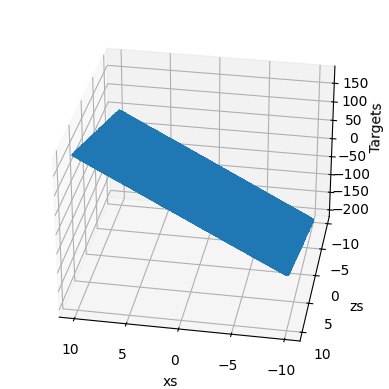

In [84]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [85]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weights, biases)

[[-0.07208647]
 [-0.07790237]] [0.04123112]


In [86]:
targets = targets.reshape(observations,1)
eta = 0.01
for i in range (100):
  outputs = np.dot(inputs, weights) + biases
  deltas = outputs - targets
  loss = np.sum(deltas ** 2)/2/observations
  print(loss)

  deltas_scaled = deltas/observations
  weights = weights - eta * np.dot(inputs.T, deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3758.317898210217
1709.535974403216
798.014962568622
392.05854110128587
210.85700339480314
129.58105191281788
92.73972311185709
75.6651927640836
67.39152766961027
63.04373631962427
60.454454795417824
58.659953480060274
57.23156289420698
55.9784705240241
54.81560417203765
53.70490166751254
52.629203220863936
51.58064561700198
50.555502955524496
49.55189309563876
48.56875800348982
47.605410393163915
46.66133210583164
45.73608439662405
44.82926796994212
43.94050513128526
43.06943177225692
42.21569372835661
41.378945082201454
40.5588473331021
39.75506895327769
38.96728511743089
38.195177510842235
37.43843417379586
36.69674936355414
35.96982342550333
35.25736266971996
34.55907925126248
33.87469105340971
33.20392157347364
32.54649981099574
31.90216015821787
31.270642292754747
30.65169107241178
30.045056432100417
29.45049328280678
28.867761412571316
28.29662538943963
27.73685446634439
27.18822248788014
26.65050779893339
26.123493155130703
25.60696563506888
25.100716554291715
24.60454138097849

In [87]:
print(weights, biases)

[[13.00446478]
 [ 6.99721178]] [-7.59398768]


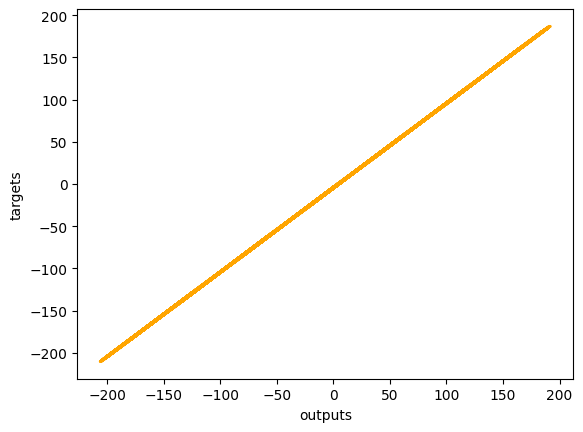

In [88]:
plt.plot(outputs, targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()